# First Task

## Importing Libraries

In [50]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")

## Loading Data

In [51]:
data = pd.read_csv("IRIS.csv")

## Data Preview

In [52]:
# Display the first few rows of the dataset
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [53]:
# Display random rows of the dataset
data.sample(4)

,sepal_length,sepal_width,petal_length,petal_width,species
60,5.0,2.0,3.5,1.0,Iris-versicolor
28,5.2,3.4,1.4,0.2,Iris-setosa
109,7.2,3.6,6.1,2.5,Iris-virginica
6,4.6,3.4,1.4,0.3,Iris-setosa


## Data Size

In [54]:
# Number of rows and columns
data.shape

(150, 5)

## Data information

In [55]:
# Information about Columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [56]:
# Statistical Information about dataset
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


## Missing Values

In [57]:
# Check if there any null value in the columns
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

## Duplicated Data and Removing it

In [58]:
data.duplicated().sum()

3

In [59]:
data=data.drop_duplicates()

In [60]:
data.duplicated().sum()

0

## EDA

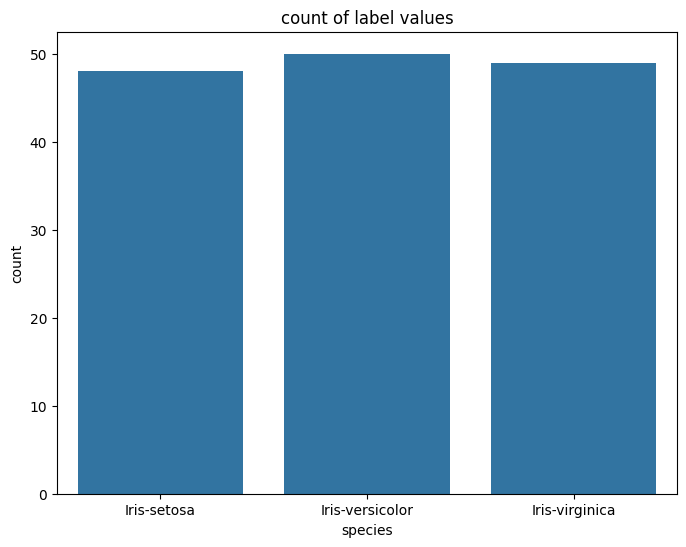

In [61]:
# Counting Values of label column
plt.figure(figsize=(8,6))
sns.countplot(data = data ,x= data['species'])
plt.xlabel('species')
plt.title('count of label values')
plt.show()

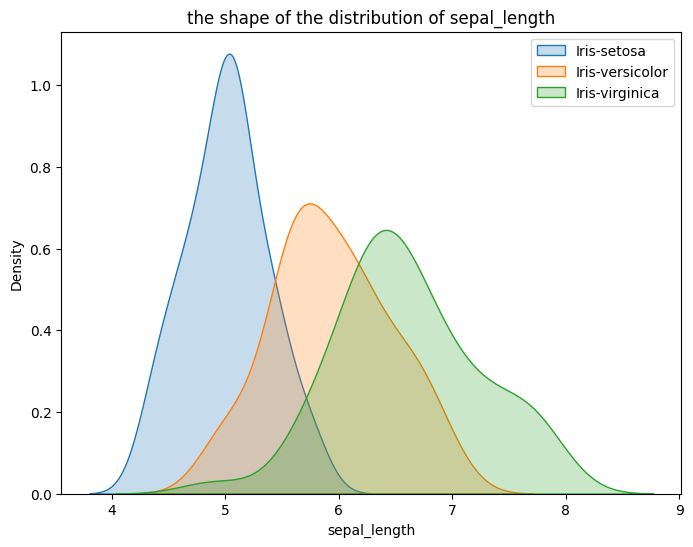

In [62]:
plt.figure(figsize=(8, 6))
sns.kdeplot(data[data['species'] == 'Iris-setosa']['sepal_length'], label='Iris-setosa', shade=True)
sns.kdeplot(data[data['species'] == 'Iris-versicolor']['sepal_length'], label='Iris-versicolor', shade=True)
sns.kdeplot(data[data['species'] == 'Iris-virginica']['sepal_length'], label='Iris-virginica', shade=True)
plt.title('the shape of the distribution of sepal_length')
plt.xlabel('sepal_length')
plt.ylabel('Density')
plt.legend()
plt.show()

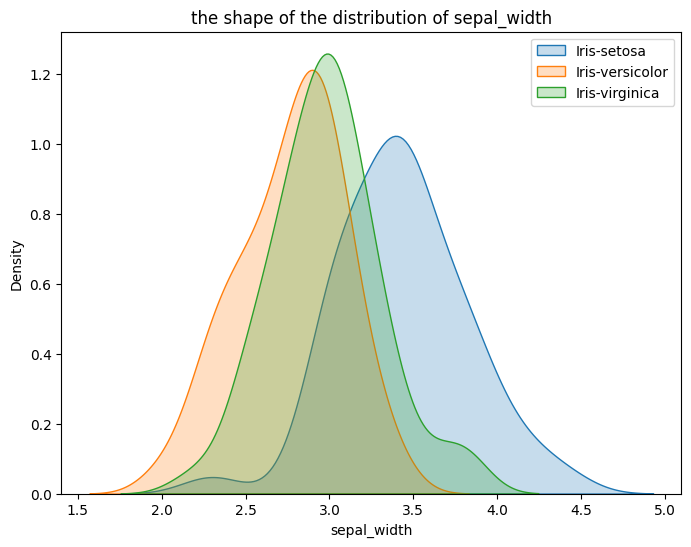

In [63]:
plt.figure(figsize=(8, 6))
sns.kdeplot(data[data['species'] == 'Iris-setosa']['sepal_width'], label='Iris-setosa', shade=True)
sns.kdeplot(data[data['species'] == 'Iris-versicolor']['sepal_width'], label='Iris-versicolor', shade=True)
sns.kdeplot(data[data['species'] == 'Iris-virginica']['sepal_width'], label='Iris-virginica', shade=True)
plt.title('the shape of the distribution of sepal_width')
plt.xlabel('sepal_width')
plt.ylabel('Density')
plt.legend()
plt.show()

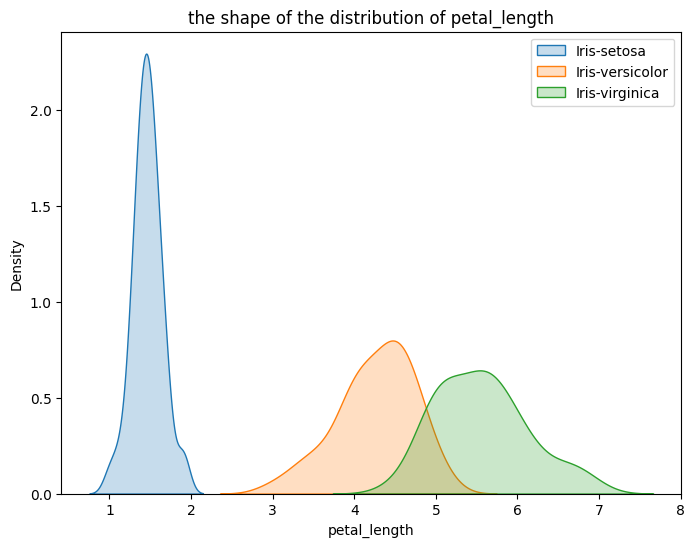

In [64]:
plt.figure(figsize=(8, 6))
sns.kdeplot(data[data['species'] == 'Iris-setosa']['petal_length'], label='Iris-setosa', shade=True)
sns.kdeplot(data[data['species'] == 'Iris-versicolor']['petal_length'], label='Iris-versicolor', shade=True)
sns.kdeplot(data[data['species'] == 'Iris-virginica']['petal_length'], label='Iris-virginica', shade=True)
plt.title('the shape of the distribution of petal_length')
plt.xlabel('petal_length')
plt.ylabel('Density')
plt.legend()
plt.show()

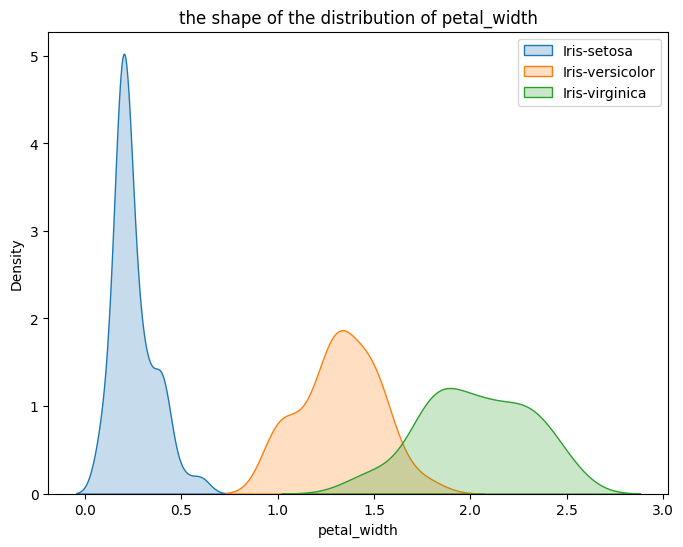

In [65]:
plt.figure(figsize=(8, 6))
sns.kdeplot(data[data['species'] == 'Iris-setosa']['petal_width'], label='Iris-setosa', shade=True)
sns.kdeplot(data[data['species'] == 'Iris-versicolor']['petal_width'], label='Iris-versicolor', shade=True)
sns.kdeplot(data[data['species'] == 'Iris-virginica']['petal_width'], label='Iris-virginica', shade=True)
plt.title('the shape of the distribution of petal_width')
plt.xlabel('petal_width')
plt.ylabel('Density')
plt.legend()
plt.show()

In [66]:
from sklearn.preprocessing import LabelEncoder # type: ignore

# Encode the target variable (species)
label_encoder = LabelEncoder()
data['species_encoded'] = label_encoder.fit_transform(data['species'])

# Display the first few rows to check the encoding
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_encoded
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


In [67]:
# Features and target
x = data.drop(columns=['species', 'species_encoded'])
y = data['species_encoded']

In [68]:
# Split the data into training and testing sets (70% train, 30% test)
from sklearn.model_selection import train_test_split # type: ignore
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=5)

In [69]:
from sklearn.linear_model import LogisticRegression 
# Train the logistic regression model
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [70]:
# Make predictions on the test set
y_pred = model.predict(X_test)

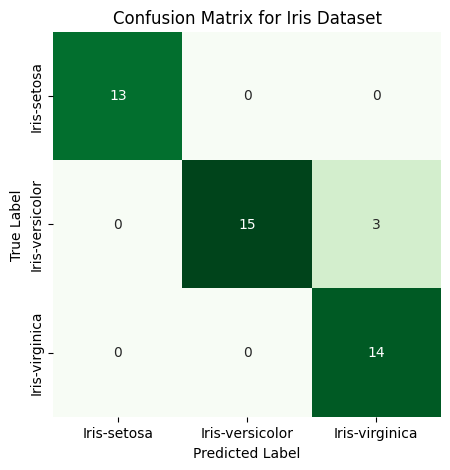

In [71]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, y_pred)
target_names=np.array([0,1,2])
# Create a DataFrame for better readability
cm_df = pd.DataFrame(confusion, index=target_names, columns=target_names)

# Plot the confusion matrix
plt.figure(figsize=(5,5))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Greens', cbar=False,xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)

# Labeling the axes and title
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Iris Dataset')

# Display the plot
plt.show()


In [72]:
from sklearn.metrics import accuracy_score

# Evaluate the model
test_accuracy = accuracy_score(y_test, y_pred)

print("Testing accuracy =",test_accuracy*100)

Testing accuracy = 93.33333333333333


In [73]:
y_train_pred =  model.predict(X_train)
train_accuracy = accuracy_score(y_train,y_train_pred)
print("Training accuracy =",train_accuracy*100)

Training accuracy = 96.07843137254902
